<a href="https://colab.research.google.com/github/lawrenceN/d3/blob/master/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls '/content/drive/My Drive/datasets/car_data'

test/  train/  train_val_test_numpy.pkl  validation/


# Import Statements for Image Processing

In [ ]:
from collections import Counter

# image processing library
from cv2 import imread, resize, cvtColor, COLOR_BGR2RGB
from glob import glob
from random import randint
from tqdm import tqdm

# plotting
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Folder definitions

In [ ]:
root_folder = '/content/drive/My Drive/datasets'
class_names = ['swift', 'wagonr']
dataset_name = 'car_data'
train_folder = 'train'
validation_folder = 'validation'
test_folder = 'test'

In [ ]:
def get_files_list(folder_name):
  '''
  A method to read the list of files from a folder.
  '''
  files_list = []
  for class_name in class_names:
    for file_name in glob(f'{root_folder}/{dataset_name}/{folder_name}/{class_name}/*.jpg'):
      files_list.append(file_name)
  return files_list

In [ ]:
train_list = get_files_list(train_folder)

In [ ]:
train_list[0]

'/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'

In [ ]:
print(f'Number of files in thNe train folder: {len(train_list)}')

Number of files in thNe train folder: 2400


In [ ]:
test_list = get_files_list(test_folder)

In [ ]:
print(f'Number of files in the test folder: {len(test_list)}')

Number of files in the test folder: 800


In [ ]:
validation_list = get_files_list(validation_folder)

In [ ]:
print(f'Number of files in the validation folder: {len(validation_list)}')

Number of files in the validation folder: 800


In [ ]:
!pip install PyQt4f

ERROR: Could not find a version that satisfies the requirement PyQt4f (from versions: none)
ERROR: No matching distribution found for PyQt4f


In [ ]:
import skimage.viewer
import skimage.io
image = skimage.io.imread(fname=test_list[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Viewer requires Qt
  """Entry point for launching an IPython kernel.


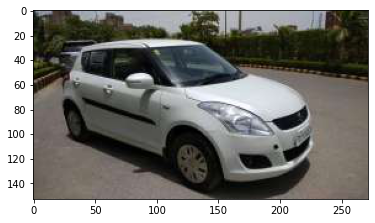

In [ ]:
# viewer = skimage.viewer.ImageViewer(test_list[0])
# viewer.show()

plt.imshow(image)

In [ ]:
# Defining some image dimension constants
new_w,new_h = 100,100
n_channels = 3  # RGB

In [ ]:
def read_and_process_image(file_path,show_details=False):
  '''
  Read the image from the file and folder name, resize it to be 100 by 100
  and preprocess it.
  '''
  img = imread(file_path)
  if show_details:
    print(f"Shape: {img.shape}") # print only when asked

  # Resize the image to a constant height and width
  img = resize(img, (new_w, new_h))
  img = cvtColor(img, COLOR_BGR2RGB)

  # normalize the images
  img = img/255
  if show_details:
    print(f"Reshape: {img.shape}") # print details 
  return img

In [ ]:
img = read_and_process_image(train_list[902], show_details=True)

Shape: (204, 272, 3)
Reshape: (100, 100, 3)


In [ ]:
img.shape

(100, 100, 3)

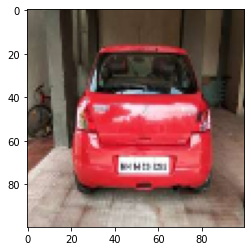

In [ ]:
plt.imshow(img)

In [ ]:
a = '/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'
a.split('/')
a

2400

In [ ]:
def show_images(image_list):
  '''
  Method for debugging and visualization of images
  '''
  n:int=len(image_list)
  f = plt.figure(figsize=(15,15))
  columns = 4
  rows = 4
  for i in range(columns*rows):
    image_path = image_list[randint(0, n-1)]
    fol_name = image_path.split('/')[-2]

    # Debug the plot figure
    ax = f.add_subplot(rows, columns, i+1)
    ax.set_title(fol_name)
    img = read_and_process_image(image_path)
    plt.axis('off')
    plt.imshow(img)
  plt.show(block=True)

In [ ]:
n = '/content/drive/My Drive/datasets/car_data/train/swift/snven08n0x453-IN.jpg'
n.split('/')

['',
 'content',
 'drive',
 'My Drive',
 'datasets',
 'car_data',
 'train',
 'swift',
 'snven08n0x453-IN.jpg']

In [ ]:
list(range(16))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

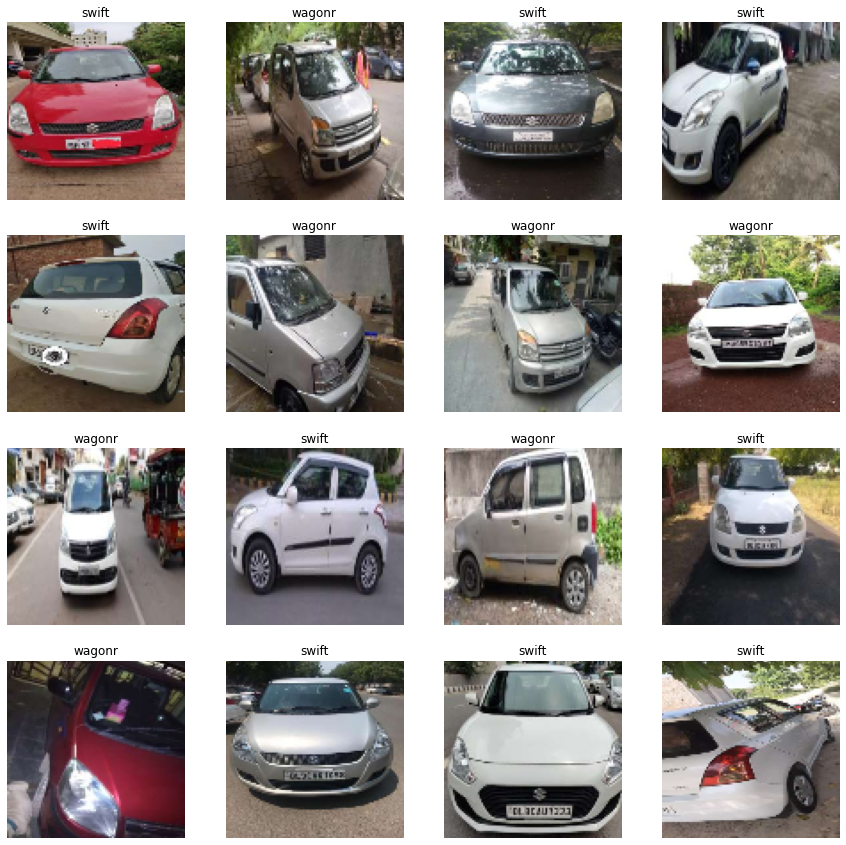

In [ ]:
show_images(train_list)

# Visualization of Class Distribution

In [ ]:
def visualize_classes(image_path_list):
  '''
  Visualize the images using PyPlot
  '''
  image_class_list = []
  for image_path in image_path_list:
    fol_name = image_path.split('/')[-2]
    image_class_list.append(fol_name)
  image_class_list_counter = Counter(image_class_list)
  plt.bar(image_class_list_counter.keys(), image_class_list_counter.values())
  return image_class_list

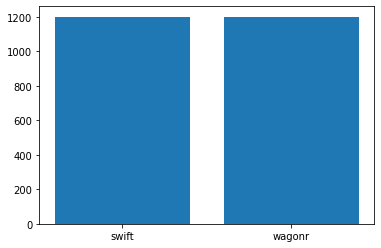

In [ ]:
train_class_list = visualize_classes(train_list)

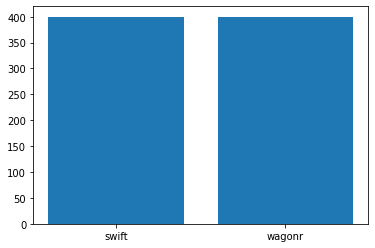

In [ ]:
validation_class_list = visualize_classes(validation_list)

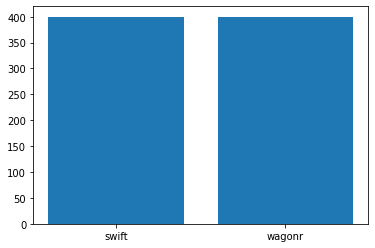

In [ ]:
test_class_list = visualize_classes(test_list)

# Convert data to Numpy

In [ ]:
def prepare_numpy_image_array(image_path_list):
  """
  Prepare a Numpy version of the image data for further usage in training
  """
  images_numpy=np.zeros((len(image_path_list), new_w, new_h, n_channels))
  for idx in tqdm(range(len(image_path_list))):
    img = read_and_process_image(image_path_list[idx])
    images_numpy[idx,:,:,:] = img
  return images_numpy

In [ ]:
train_images_numpy = prepare_numpy_image_array(train_list)
print(f'Train images shape: {train_images_numpy.shape}')

100%|██████████| 2400/2400 [29:42<00:00,  1.35it/s]

Train images shape: (2400, 100, 100, 3)


In [ ]:
val_images_numpy = prepare_numpy_image_array(validation_list)
print(f'Validation images shape: {val_images_numpy.shape}')

100%|██████████| 800/800 [10:01<00:00,  1.33it/s]

Validation images shape: (800, 100, 100, 3)


In [ ]:
test_images_numpy = prepare_numpy_image_array(test_list)
print(f'Test images shape: {test_images_numpy.shape}')

100%|██████████| 800/800 [08:03<00:00,  1.66it/s]

Test images shape: (800, 100, 100, 3)


# Validate Numpy and Original Data

This step helps in making sure that the transformations done e.g. conversion to Numpy and the original are one and the same. Sampling can be done with vairous examples

In [ ]:
print(f'Range of pixel values in test images: [{np.amin(test_images_numpy)}, {np.amax(test_images_numpy)}]')

Range of pixel values in test images: [0.0, 1.0]


In [ ]:
print(f'Range of pixel values in test images: [{np.amin(train_images_numpy)}, {np.amax(train_images_numpy)}]')

Range of pixel values in test images: [0.0, 1.0]


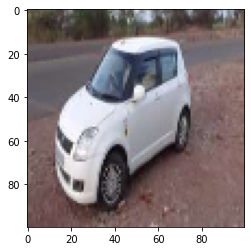

In [ ]:
plt.imshow(test_images_numpy[100,:,:,:])

Shape: (126, 272, 3)
Reshape: (100, 100, 3)


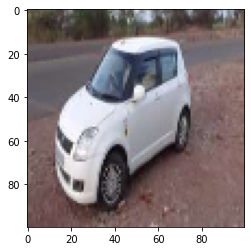

In [ ]:
img = read_and_process_image(test_list[100], show_details=True)
# plot the image inline
plt.imshow(img)

# Saving the data to Pickle

Pickling the data ensures that all the preprocessing steps are preserved and the data is saved to the local disk in the state in which it was processed (https://docs.python.org/3/library/pickle.html

In [ ]:
import pickle as pkl

In [ ]:
pickle_path = f"{root_folder}/{dataset_name}/train_val_test_numpy.pkl"

In [ ]:
pickle_path

'/content/drive/My Drive/datasets/car_data/train_val_test_numpy.pkl'

In [ ]:
pkl.dump([train_images_numpy, train_class_list, val_images_numpy, validation_class_list, test_images_numpy, test_class_list], open(pickle_path, 'wb'))
print(f'Saving Numpy arrays to {pickle_path}')

Saving Numpy arrays to /content/drive/My Drive/datasets/car_data/train_val_test_numpy.pkl


# Creating Convolutional Neural Networks (CNN)

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print("Number of samples in the training data: " + str(len(x_train)))
print("Number of samples in the test data: " + str(len(x_test)))

Number of samples in the training data: 60000
Number of samples in the test data: 10000


In [ ]:
print('Initial shape or dimensions of the x_train: ' + str(x_train.shape))

Initial shape or dimensions of the x_train: (60000, 28, 28)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

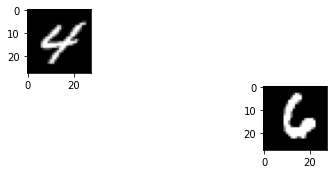

In [ ]:
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))